In [7]:
import sys
sys.path.append('../')

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
import numpy as np
import segmentboard as segb
from utils import bgr2rgb

from matplotlib import pyplot as plt
%matplotlib inline

In [128]:
IMG_PATH = '../../data/raw/jpg/IMG_20170518_204827.jpg'

## test `binarize_image()` and `add_frame()`:

In [129]:
img = bgr2rgb(cv2.imread(IMG_PATH))
bin_img = segb.binarize_image(img)
framed_bin_img = segb.add_frame(bin_img)

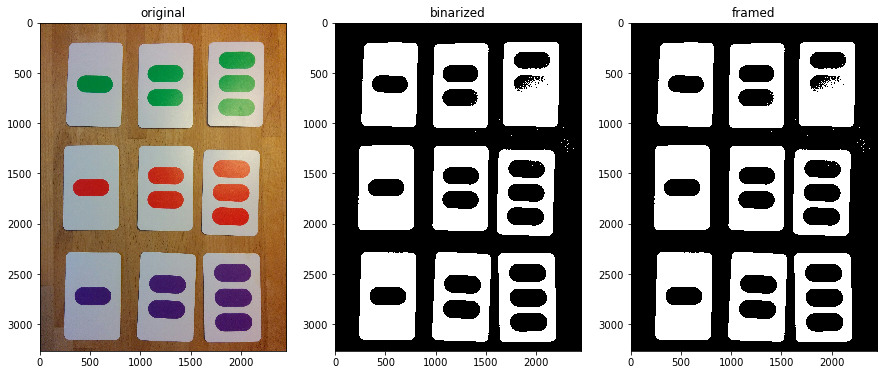

In [130]:
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('original')

plt.subplot(1, 3, 2)
plt.imshow(bin_img, cmap=plt.cm.gray);
plt.title('binarized')

plt.subplot(1, 3, 3)
plt.imshow(framed_bin_img, cmap=plt.cm.gray)
plt.title('framed');

## test `mean_row_col()`

In [131]:
mean_row, mean_col = segb.mean_row_col(img)
mean_row_bin, mean_col_bin = segb.mean_row_col(bin_img)
mean_row_fra, mean_col_fra = segb.mean_row_col(framed_bin_img)

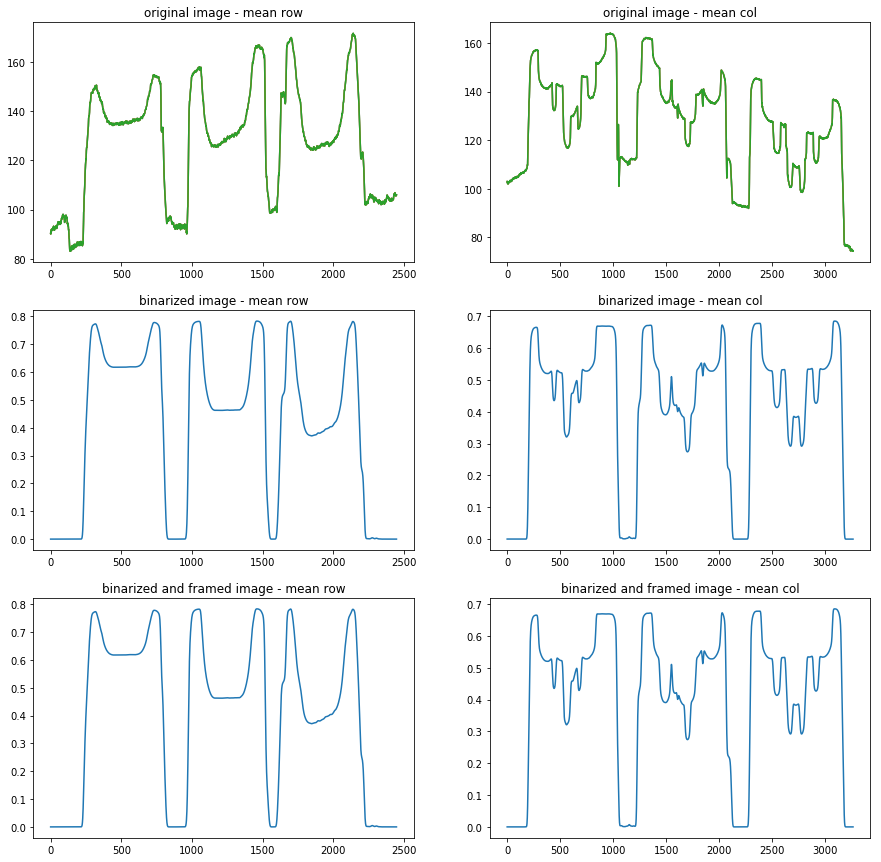

In [132]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.plot(mean_row)
plt.title('original image - mean row')

plt.subplot(3, 2, 2)
plt.plot(mean_col)
plt.title('original image - mean col')

plt.subplot(3, 2, 3)
plt.plot(mean_row_bin)
plt.title('binarized image - mean row')

plt.subplot(3, 2, 4)
plt.plot(mean_col_bin)
plt.title('binarized image - mean col')

plt.subplot(3, 2, 5)
plt.plot(mean_row_fra)
plt.title('binarized and framed image - mean row')

plt.subplot(3, 2, 6)
plt.plot(mean_col_fra)
plt.title('binarized and framed image - mean col');

## test `lower_cut_points`

In [133]:
ex_arr = np.array([0., 0.1, 0.2, 0.5, 0.5, 0.3, 0.2, 0.1, 0.])
segb.lower_cut_points(ex_arr, threshold=0.25)

array([2, 5])

In [134]:
segb.lower_cut_points(mean_row_fra, threshold=0.25)

array([ 239,  804,  971, 1525, 1618, 2201])

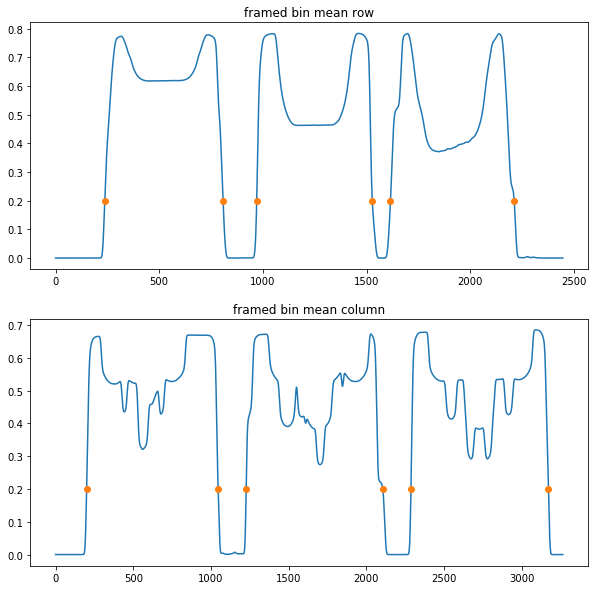

In [136]:
thres = 0.20

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.title('framed bin mean row')
plt.plot(mean_row_fra);
cut_points_row = segb.lower_cut_points(mean_row_fra, thres)
plt.plot(cut_points_row, np.ones(len(cut_points_row)) * thres, 'o')

plt.subplot(2, 1, 2)
plt.title('framed bin mean column')
plt.plot(mean_col_fra);
cut_points_col = segb.lower_cut_points(mean_col_fra, thres)
plt.plot(cut_points_col, np.ones(len(cut_points_col)) * thres, 'o');

In [137]:
xs_cuts = segb.lower_cut_points(mean_row_fra, thres).reshape((-1, 2))
ys_cuts = segb.lower_cut_points(mean_col_fra, thres).reshape((-1, 2))
print("xs cuts\n", xs_cuts)
print("ys cuts\n", ys_cuts)

xs cuts
 [[ 237  807]
 [ 970 1527]
 [1615 2212]]
ys cuts
 [[ 199 1045]
 [1225 2104]
 [2286 3170]]


In [138]:
cards = segb.extract_cards(img)
print(len(cards))

9


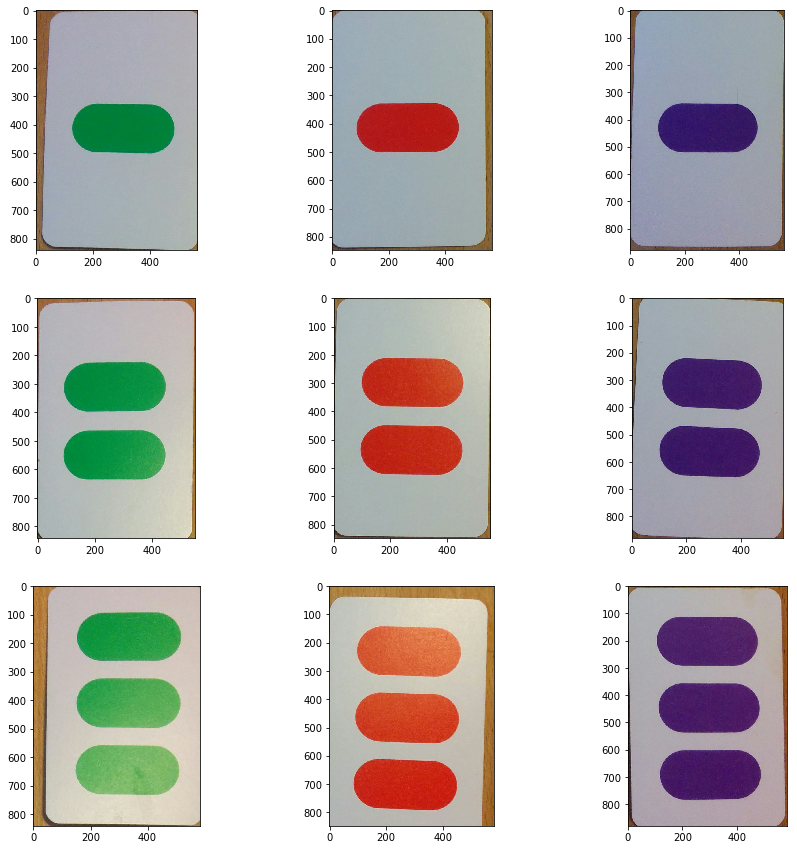

In [139]:
# display segmented cards
plt.figure(figsize=(15, 15))

nb_cards = len(cards)
nb_cols = 3
nb_rows = nb_cards // nb_cols
for i, card in enumerate(cards):
    plt.subplot(nb_rows, nb_cols, i + 1)
    plt.imshow(card);